In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install xlrd

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [3]:
df=pd.read_excel('GSAF5.xls')

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [4]:
df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,...,Blacktip reef shark,"Trinidad Guardian, 2/11/2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
6963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(6968, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6968 entries, 0 to 6967
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6943 non-null   object 
 1   Year            6941 non-null   float64
 2   Type            6925 non-null   object 
 3   Country         6893 non-null   object 
 4   State           6461 non-null   object 
 5   Location        6378 non-null   object 
 6   Activity        6357 non-null   object 
 7   Name            6723 non-null   object 
 8   Sex             6364 non-null   object 
 9   Age             3949 non-null   object 
 10  Injury          6908 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3417 non-null   object 
 13  Species         3811 non-null   object 
 14  Source          6924 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [8]:
#Date is having object type so we need to change,as well as year is float and there are duplicate columns case number 1

In [9]:
df.isnull().sum()    #(6968, 23)

Date                25
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        586
Time              3551
Species           3157
Source              44
pdf                169
href formula       149
href               172
Case Number        170
Case Number.1      171
original order     169
Unnamed: 21       6967
Unnamed: 22       6966
dtype: int64

In [10]:
#df["Species "].unique()

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
df.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'unnamed:_11', 'time', 'species_',
       'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1',
       'original_order', 'unnamed:_21', 'unnamed:_22'],
      dtype='object')

In [13]:
new_df = df.drop(columns = ['unnamed:_11','unnamed:_22','unnamed:_21','original_order','case_number','case_number.1','pdf','href_formula','href'])
new_df

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source
0,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
1,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
2,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024"
3,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
4,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,Shoulder bitten,06h30,Blacktip reef shark,"Trinidad Guardian, 2/11/2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
new_df.columns

Index(['date', 'year', 'type', 'country', 'state', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'time', 'species_', 'source'],
      dtype='object')

In [15]:
new_df.date.unique()
#pd.to_datetime(new_df,dayfirst=True)

array(['04 Mar 2024', '02 Mar-2024', '25 Feb-2024', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [16]:
new_df.date.value_counts()

date
1957           9
1942           8
1958           7
1941           6
No date        6
              ..
07-Jul-2000    1
09-Jul-2000    1
10-Jul-2000    1
12-Jul-2000    1
1845-1853      1
Name: count, Length: 6002, dtype: int64

In [17]:
"""# Extract valid date from "Reported" strings
new_df['valid_date'] = new_df['date'].str.extract(r'(\d{1,2}-[A-Za-z]{3}-\d{4})')
new_df['valid_date'] = new_df['valid_date'].str.replace('Nox', 'Nov')
# Fill missing dates with a default value (January 1, 1900)
new_df['date'] = new_df['date'].fillna('01-Jan-1900')

# Convert to datetime again
new_df['valid_date'] = pd.to_datetime(new_df['date'], format='%d-%b-%Y')
print(new_df)"""

'# Extract valid date from "Reported" strings\nnew_df[\'valid_date\'] = new_df[\'date\'].str.extract(r\'(\\d{1,2}-[A-Za-z]{3}-\\d{4})\')\nnew_df[\'valid_date\'] = new_df[\'valid_date\'].str.replace(\'Nox\', \'Nov\')\n# Fill missing dates with a default value (January 1, 1900)\nnew_df[\'date\'] = new_df[\'date\'].fillna(\'01-Jan-1900\')\n\n# Convert to datetime again\nnew_df[\'valid_date\'] = pd.to_datetime(new_df[\'date\'], format=\'%d-%b-%Y\')\nprint(new_df)'

In [18]:
#new_df['date'] = pd.to_datetime(new_df['date'], errors='coerce')

In [19]:
#new_df.shape[0] / new_df.age.isna().sum()

### Year- Converting Float to Int Datatype

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6968 entries, 0 to 6967
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6943 non-null   object 
 1   year      6941 non-null   float64
 2   type      6925 non-null   object 
 3   country   6893 non-null   object 
 4   state     6461 non-null   object 
 5   location  6378 non-null   object 
 6   activity  6357 non-null   object 
 7   name      6723 non-null   object 
 8   sex       6364 non-null   object 
 9   age       3949 non-null   object 
 10  injury    6908 non-null   object 
 11  time      3417 non-null   object 
 12  species_  3811 non-null   object 
 13  source    6924 non-null   object 
dtypes: float64(1), object(13)
memory usage: 762.3+ KB


In [21]:
mean_year = new_df['year'].mean() 
new_df['year'].fillna(mean_year, inplace=True)

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6968 entries, 0 to 6967
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6943 non-null   object 
 1   year      6968 non-null   float64
 2   type      6925 non-null   object 
 3   country   6893 non-null   object 
 4   state     6461 non-null   object 
 5   location  6378 non-null   object 
 6   activity  6357 non-null   object 
 7   name      6723 non-null   object 
 8   sex       6364 non-null   object 
 9   age       3949 non-null   object 
 10  injury    6908 non-null   object 
 11  time      3417 non-null   object 
 12  species_  3811 non-null   object 
 13  source    6924 non-null   object 
dtypes: float64(1), object(13)
memory usage: 762.3+ KB


In [23]:
new_df['year'] = new_df['year'].astype(int)

In [24]:
new_df['year']

0       2024
1       2024
2       2024
3       2024
4       2024
        ... 
6963    1934
6964    1934
6965    1934
6966    1934
6967    1934
Name: year, Length: 6968, dtype: int32

### Type

In [25]:
new_df['type'].value_counts()

type
Unprovoked             5106
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [26]:
new_df['type'] = new_df['type'].str.strip()  # Remove leading/trailing spaces
new_df['type'].replace({'Provoked': 'Provoked'}, inplace=True)  # Merge similar categories
new_df.drop(new_df[new_df['type'] == '?'].index, inplace=True)
new_df['type'].replace(['Unconfirmed', 'Unverified', 'Under investigation'], 'Investigation', inplace=True)
new_df['type'].replace(['Questionable'],'Invalid',inplace=True)

In [27]:
new_df['type'].value_counts()

type
Unprovoked       5106
Provoked          637
Invalid           574
Watercraft        355
Sea Disaster      242
Boat                7
Investigation       3
Name: count, dtype: int64

In [28]:
new_df.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source
0,04 Mar 2024,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
1,02 Mar-2024,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
2,25 Feb-2024,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024"
3,14 Feb-2024,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
4,04-Feb-2024,2024,Provoked,TRINIDAD,NaN,NaN,Spearfishing,male,M,NaN,Shoulder bitten,06h30,Blacktip reef shark,"Trinidad Guardian, 2/11/2014"


### Sex

In [29]:
new_df.sex.value_counts()

sex
M        5577
F         778
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

In [30]:
new_df['sex'] = new_df['sex'].str.strip()
new_df['sex'].replace(['N','.','lli','M x 2'],np.nan,inplace=True)
new_df['sex'].value_counts()

sex
M    5580
F     778
Name: count, dtype: int64

### Activity	

In [31]:
new_df.activity.sample(10)

1336                      Surfing
982                           NaN
6015    Fell overboard & swimming
6209                     Swimming
3761                      Surfing
3763                      Fishing
616                       Walking
1403                       Wading
3417                 Spearfishing
6669                     Swimming
Name: activity, dtype: object

In [32]:
#new_df.activity.value_counts()
new_df['activity'] = new_df['activity'].str.strip()
new_df['activity'] = new_df['activity'].str.upper()
new_df['activity'].value_counts().head(20)

activity
SURFING            1126
SWIMMING           1022
FISHING             504
SPEARFISHING        390
WADING              174
BATHING             166
DIVING              144
SNORKELING          129
STANDING            115
SCUBA DIVING        101
BODY BOARDING        70
BOOGIE BOARDING      59
BODY SURFING         55
KAYAKING             41
FREE DIVING          35
TREADING WATER       33
FELL OVERBOARD       33
PEARL DIVING         32
SURF SKIING          24
WINDSURFING          20
Name: count, dtype: int64

In [33]:
new_df['activity'].replace(['JUMPING','STANDING','WADING','WALKING','PLAYING','SPLASHING','DANGLING FEET IN THE WATER'],'BATHING',inplace=True)
new_df['activity'].replace(['BODY SURFING','BOOGIE BOARDING','BODY-BOARDING'],'BODY BOARDING',inplace=True)
new_df['activity'].replace('.*SPEARFISHING.*','SPEARFISHING',regex=True,inplace=True)
new_df['activity'].replace('.*DIVING.*','DIVING',regex=True,inplace=True)
new_df['activity'].replace(['.*SURFING','KITE BOARDING','.*SKIING'],'SURFING',regex=True,inplace=True)
new_df['activity'].replace(['.*KAYAK.*','.*BOAT.*','CANOEING','ROWING','SAILING','FISHING FOR MACKEREL'],'ON BOAT',regex=True,inplace=True)
new_df['activity'].replace(['TREADING WATER','FLOATING ON HIS BACK'],'FLOATING',inplace=True)
new_df['activity'].replace(['.*OVERBOARD.*','JUMPED INTO THE WATER'],'FELL INTO THE WATER',regex=True,inplace=True)
new_df['activity'].replace('FREEDOM SWIMMING','SWIMMING',inplace=True)
new_df['activity'].replace('SURF FISHING','WADE FISHING',inplace=True)
new_df['activity'].replace(['SITTING ON SURFBOARD','SURFING (SITTING ON HIS BOARD)','PADDLE BOARDING','STAND-UP PADDLEBOARDING','PADDLING ON SURFBOARD'],'ON SURFBOARD',inplace=True)
new_df['activity'].replace(['.{,30} SHARK.','SHARK RELATED ACTIVITY.*'],'SHARK RELATED ACTIVITY',regex=True,inplace=True)

In [34]:
mask = new_df['activity'].value_counts().loc[new_df['activity'].value_counts() < 5].index
new_df.loc[new_df['activity'].isin(mask),'activity'] = 'OTHER'
new_df['activity'].value_counts().head(30)

activity
SURFING                   1239
OTHER                     1104
SWIMMING                  1031
DIVING                     572
FISHING                    504
BATHING                    501
SPEARFISHING               483
ON BOAT                    284
BODY BOARDING              188
SNORKELING                 129
FELL INTO THE WATER        116
FLOATING                    58
SHARK RELATED ACTIVITY      42
ON SURFBOARD                41
WADE FISHING                21
SHARK FISHING               16
SEA DISASTER                14
SHIPWRECK                    7
MURDER                       6
Name: count, dtype: int64

In [35]:
#new_df.age.value_counts().sample(10)
#new_df['age'] = new_df['age'].replace({"20s":"25", "30s":"35", "teen": "15", "Teen": "15", "mid-30s":"35", "21 or 26":"24", "60's":"65", "60s":"65", "12 or 13":"12", "50s":"55", "9 & 12":"9", "Elderly": "12", "6½":"6"})

### Age

In [36]:
new_df['age'].replace(to_replace=['Teen','teen'],value='16',inplace=True)
new_df['age'].replace(to_replace='30s',value='35',inplace=True)
new_df['age'].replace(to_replace='20s',value='25',inplace=True)
new_df['age'] = pd.to_numeric(new_df['age'], errors='coerce', downcast='integer')
new_df['age'].value_counts().head(20)

age
17.0    173
16.0    165
18.0    157
15.0    155
20.0    152
19.0    150
21.0    128
25.0    128
22.0    126
14.0    114
24.0    113
13.0    102
26.0     96
35.0     91
23.0     87
30.0     86
29.0     86
28.0     86
12.0     85
27.0     83
Name: count, dtype: int64

### country

In [37]:
#new_df.country.unique()
new_df['country'] = new_df['country'].str.strip()
new_df['country'] = new_df['country'].str.upper()
new_df['country'].replace(to_replace=['.*OCEAN','.* SEA'],value=np.nan,regex=True,inplace=True)
new_df['country'].replace(['BETWEEN PORTUGAL & INDIA','IRAN / IRAQ','EGYPT / ISRAEL','RED SEA?'],np.nan,inplace=True)
new_df['country'].replace('EQUATORIAL GUINEA / CAMEROON','EQUATORIAL GUINEA',inplace=True)
new_df['country'].replace('CEYLON (SRI LANKA)','SRI LANKA',inplace=True)
new_df['country'].replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES',inplace=True)
new_df['country'].value_counts().head(20)

country
USA                 2538
AUSTRALIA           1480
SOUTH AFRICA         598
NEW ZEALAND          145
PAPUA NEW GUINEA     136
BAHAMAS              135
BRAZIL               122
MEXICO               106
ITALY                 72
FIJI                  70
NEW CALEDONIA         65
PHILIPPINES           64
REUNION               60
EGYPT                 51
CUBA                  49
SPAIN                 46
MOZAMBIQUE            46
INDIA                 41
FRENCH POLYNESIA      37
JAPAN                 36
Name: count, dtype: int64

### species_

In [38]:
new_df.species_.value_counts()

species_
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       88
                                                                                                                                ... 
Bull shark, 1.65 m [5'5"] was speared & killed                                                                                     1
Possibily a  1.5 to 2 m sandtiger shark                     

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

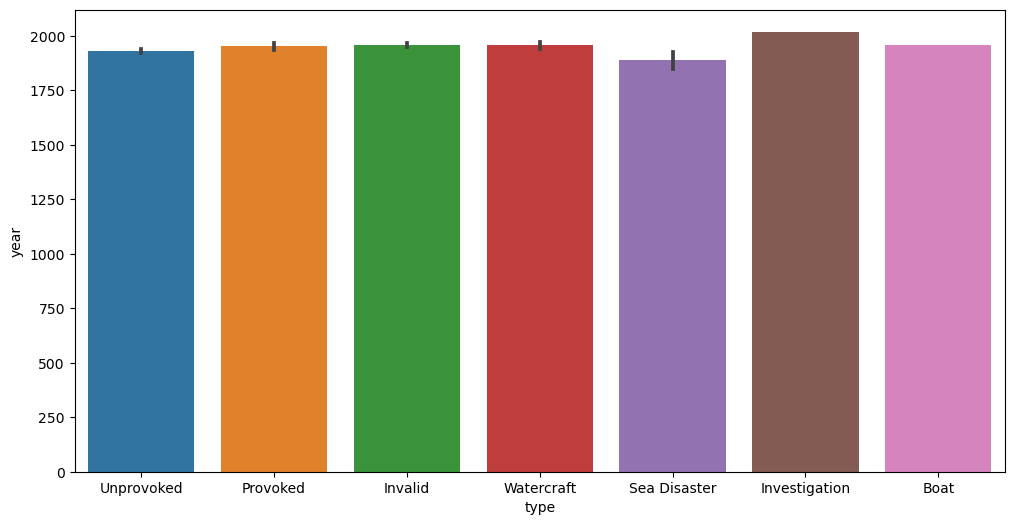

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x='type',y='year',data=new_df)
plt.show()

<Axes: xlabel='type', ylabel='count'>

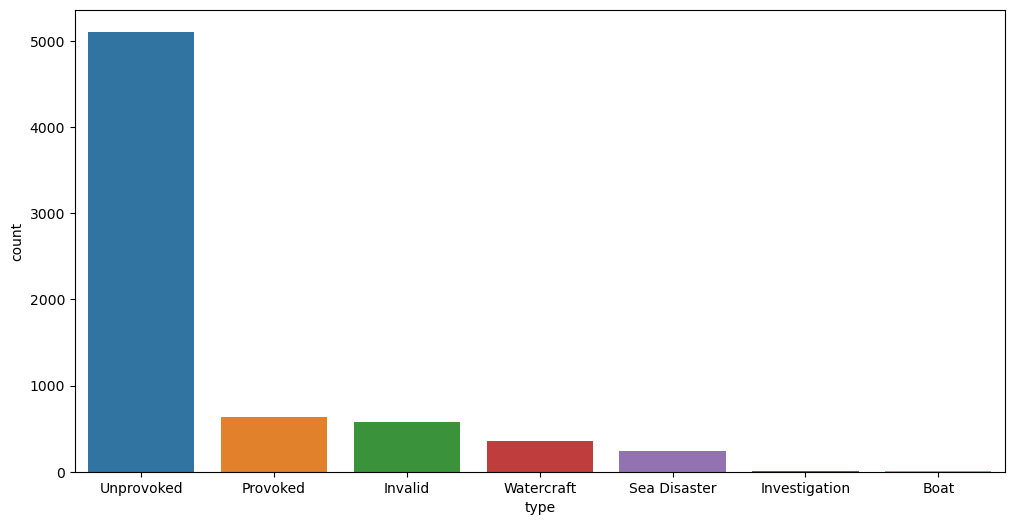

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='type',data=new_df)

In [42]:
#plt.figure(figsize=(12,6))
#sns.countplot(x='',data= dataframe)

In [43]:
### What were the countries with the most shark attacks?

In [44]:
"""country_counts = new_df['country'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Shark Attacks')
plt.title('Shark Attacks by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()"""

"country_counts = new_df['country'].value_counts()\nplt.figure(figsize=(10, 6))\nplt.bar(country_counts.index, country_counts.values, color='skyblue')\nplt.xlabel('Country')\nplt.ylabel('Number of Shark Attacks')\nplt.title('Shark Attacks by Country')\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()"

In [49]:
x = new_df['activity'].value_counts().to_frame()
x

,count
activity,
SURFING,1239
OTHER,1104
SWIMMING,1031
DIVING,572
FISHING,504
BATHING,501
SPEARFISHING,483
ON BOAT,284
BODY BOARDING,188


In [52]:
#plt.figure(figsize=(12,6))
surfing = new_df[new_df['activity']=='SURFING']
swimming = new_df[new_df['activity']=='SWIMMING']
spearfishing = new_df[new_df['activity']=='SPEARFISHING']
wading = new_df[new_df['activity']=='WADE FISHING']
fish = new_df[new_df['activity']=='FISHING']

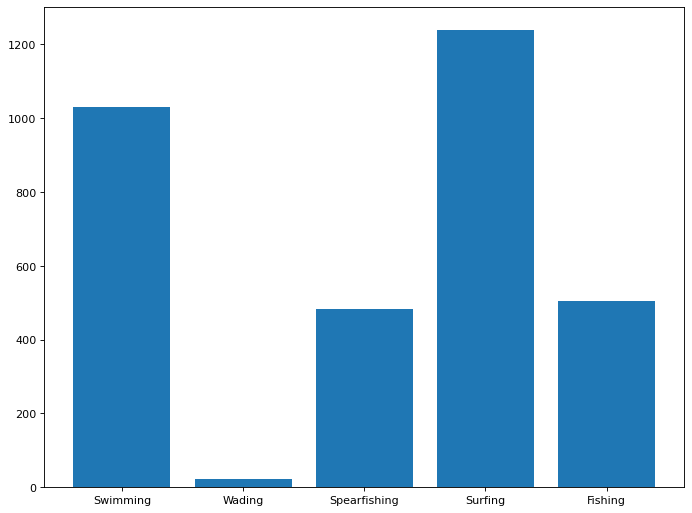

In [53]:
from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
Activities = ['Swimming', 'Wading', 'Spearfishing', 'Surfing', 'Fishing']
Attacks = [len(swimming),len(wading),len(spearfishing),len(surfing),len(fish)]
ax.bar(Activities,Attacks)
plt.show()

### We can see that the Surfing is the most attacked activitie followed by Swimming, Spearfishing, Wading and fishing